# Used Car Price Prediction
### Life cycle of Machine learning Project

1). Understanding the Problem Statement
2). Data Collection
3). Exploratory data analysis
4). Data Cleaning
5). Data Pre-Processing
6). Model Training
7). Choose best model

In [3]:
# Problem statement.
#This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
#If user can predict the price of the car based on input features.
#Prediction results can be used to give new seller the price suggestion based on market condition.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
download_dir = "./data/"
download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

Show Top 5 Records

In [15]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


Shape of the dataset

In [16]:
df.shape

(15411, 13)

Summary of the dataset

In [18]:
# Display summary statistics for a dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15411.0,6.036338,3.013291,0.0,4.0,6.00,8.0,29.00
km_driven,15411.0,55616.480631,51618.548422,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15411.0,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,1486.057751,521.106696,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15411.0,100.588254,42.972979,38.4,74.0,88.50,117.3,626.00
seats,15411.0,5.325482,0.807628,0.0,5.0,5.00,5.0,9.00
selling_price,15411.0,774971.116410,894128.363263,40000.0,385000.0,556000.00,825000.0,39500000.00


Check Datatypes in the dataset

In [20]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


 EXPLORING DATA

In [25]:
# define numerical & categorical columns
numeric_feature = [fea for fea in df.columns if df[fea].dtype != 'O']
categorical_feature = [fea for fea in df.columns if df[fea].dtype == 'O']

#print columns
print("we have {} numeric_feature : {} ".format(len(numeric_feature),numeric_feature))
print("we have {} categorical_feature : {} ".format(len(categorical_feature),categorical_feature))

we have 7 numeric_feature : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'] 
we have 6 categorical_feature : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'] 


## Feature Information

In [27]:
# car_name: Car's Full name, which includes brand and specific model name.
#brand: Brand Name of the particular car.
#model: Exact model name of the car of a particular brand.
#seller_type: Which Type of seller is selling the used car
#fuel_type: Fuel used in the used car, which was put up on sale.
#transmission_type: Transmission used in the used car, which was put on sale.
#vehicle_age: The count of years since car was bought.
#mileage: It is the number of kilometer the car runs per litre.
#engine: It is the engine capacity in cc(cubic centimeters)
#max_power: Max power it produces in BHP.
#seats: Total number of seats in car.
#selling_price: The sale price which was put up on website.

In [28]:
# proportion of count data on categorical columns
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("--------------------------------")



Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
--------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini           

## Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Features

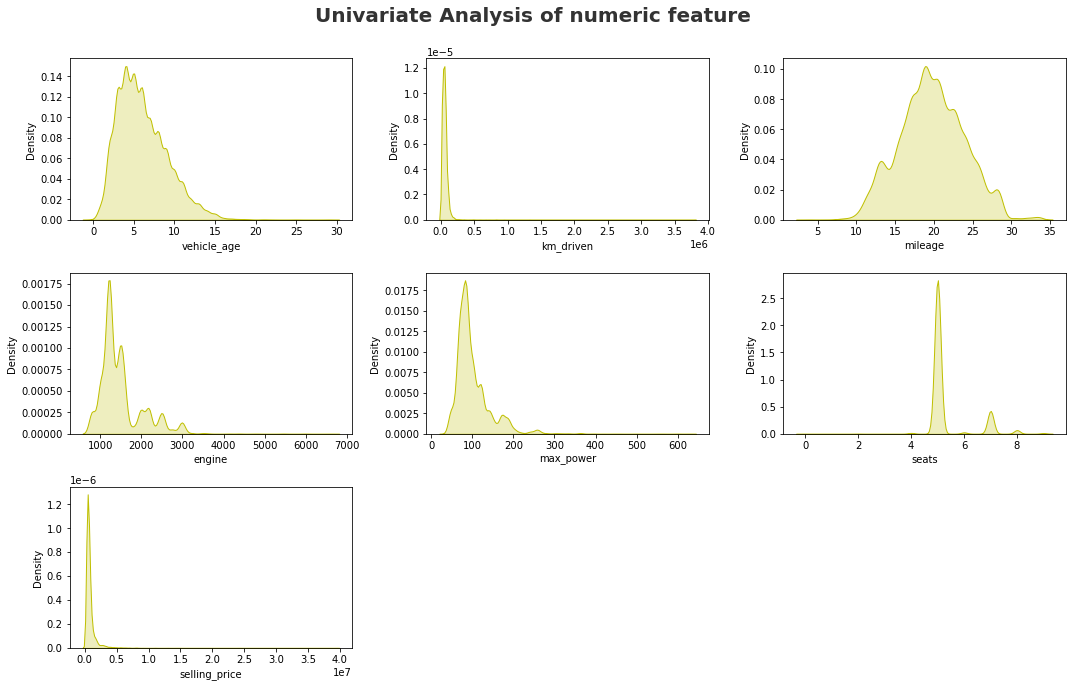

In [31]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of numeric feature ", fontsize = 20, fontweight="bold" , alpha = 0.8 , y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(5 , 3 , i+1)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True , color = 'y')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()


#### Report

Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.

Outliers in km_driven, enginer, selling_price, and max power.

##### Categorical Features

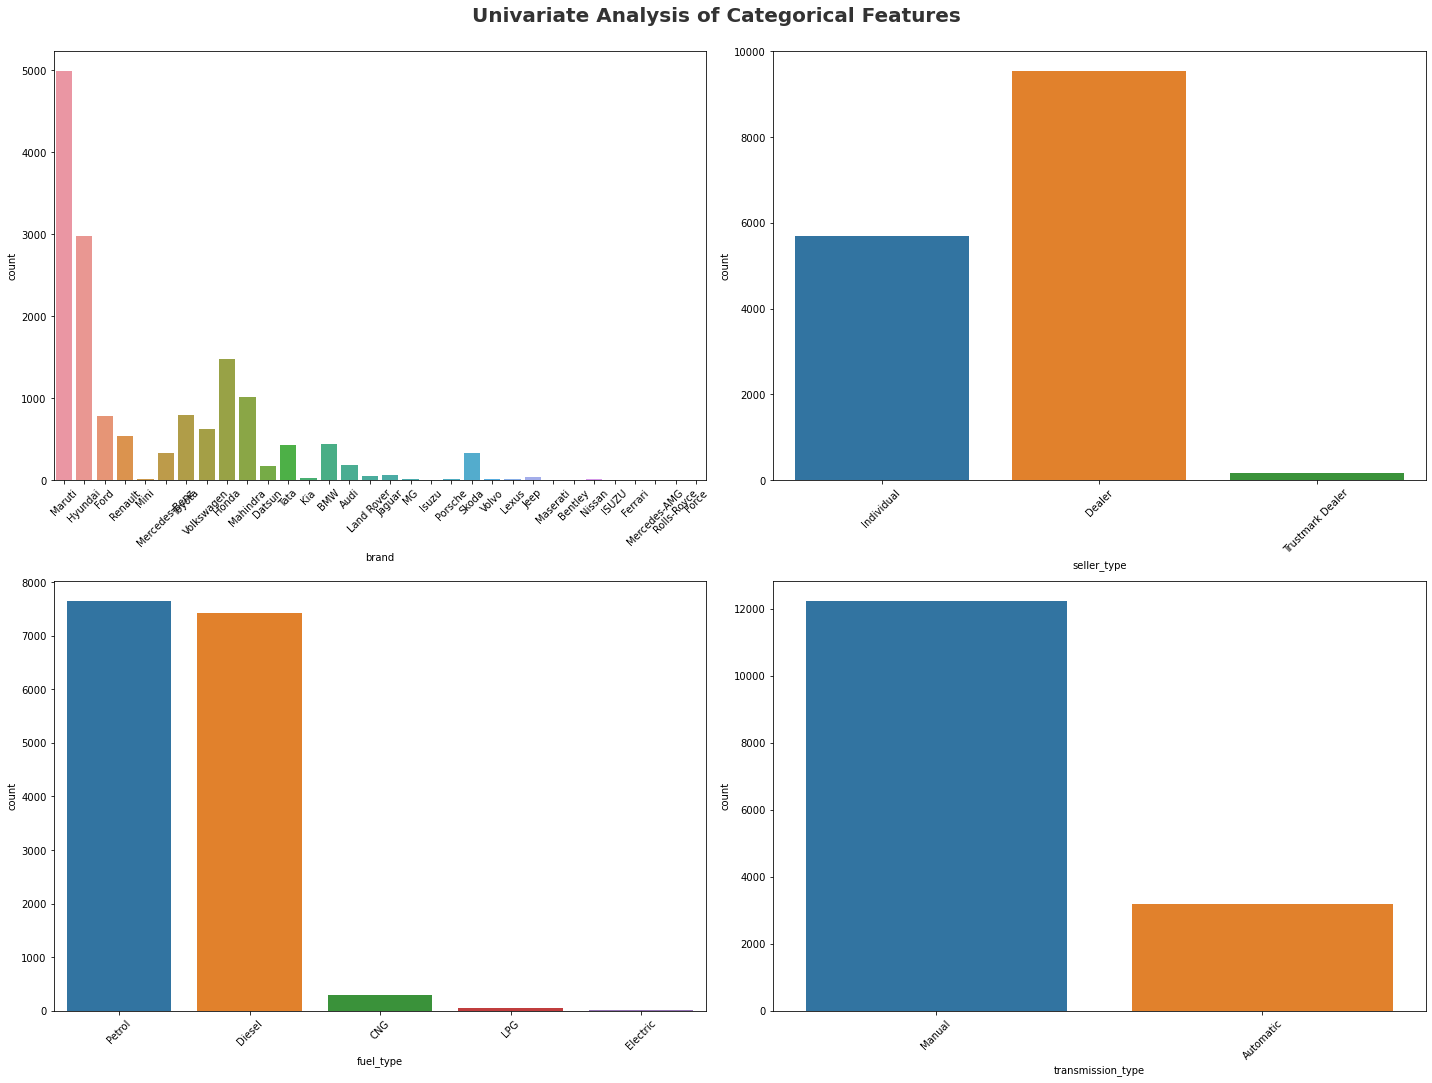

In [33]:
# categorical columns
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20,fontweight="bold",alpha=0.8, y=1.)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']

for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
               

## Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

In [37]:
df.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


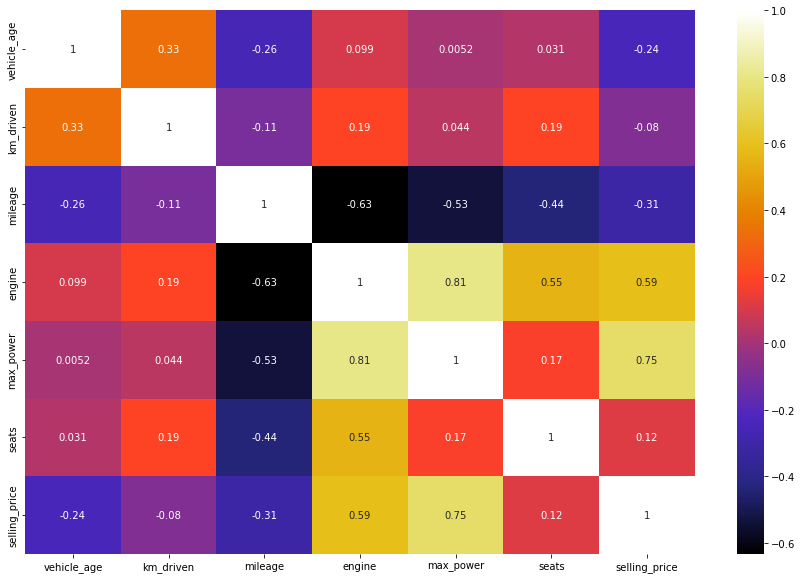

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap="CMRmap",annot=True)
plt.show()

### Report

In [40]:
#Our target column ProdTaken has a weak negative correlation on Age and MontlyIncome.
#The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.
#The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.

### Check Multicollinearity for Categorical features

#### A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

#### A chi-square statistic is one way to show a relationship between two categorical variables.

#### Here we test correlation of Categorical columns with Target column i.e Selling Price

In [42]:
from scipy.stats import chi2_contingency
chi2_test =[]
for fea in categorical_feature:
    if chi2_contingency(pd.crosstab(df['selling_price'],df[fea]))[1]<0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_feature,chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


## Checking Null Values

In [43]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [44]:
continues_feature = [fea for fea in numeric_feature if len(df[fea].unique())>=10]
print("Num of continues feature :", categorical_feature)

Num of continues feature : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


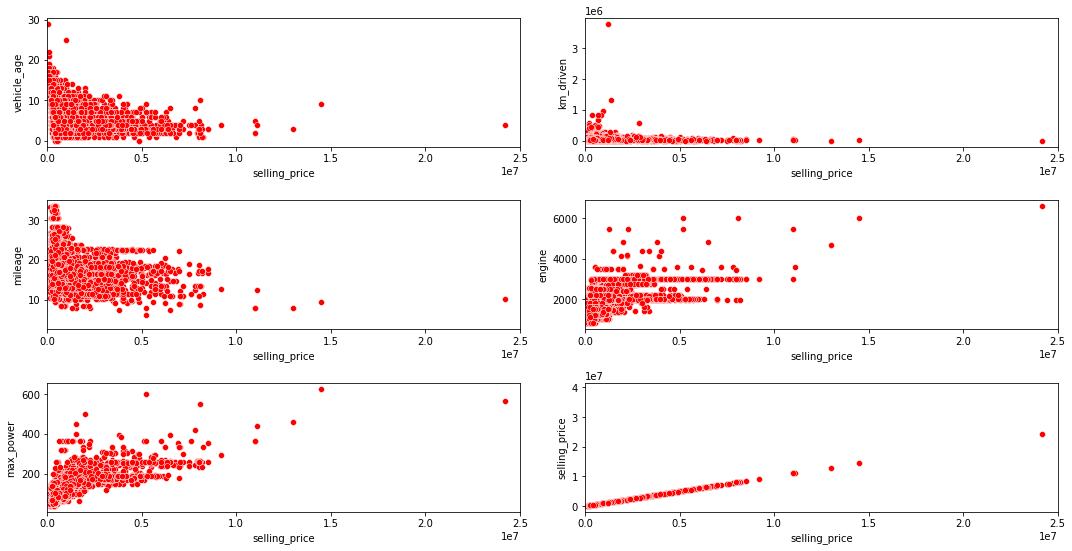

In [47]:
plt.figure(figsize=(15,20))
for i in range(0, len(continues_feature)):
    ax=plt.subplot(8,2,i+1)
    
    sns.scatterplot(data=df ,x="selling_price",y=continues_feature[i],color='r')
    plt.xlim(0,25000000)# Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

# Initial Analysis Report

### Report

Lower Vehicle age has more selling price than Vehicle with more age.

Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.

Kms Driven has negative effect on selling price.

# Visualization

### Visualize the Target Feature

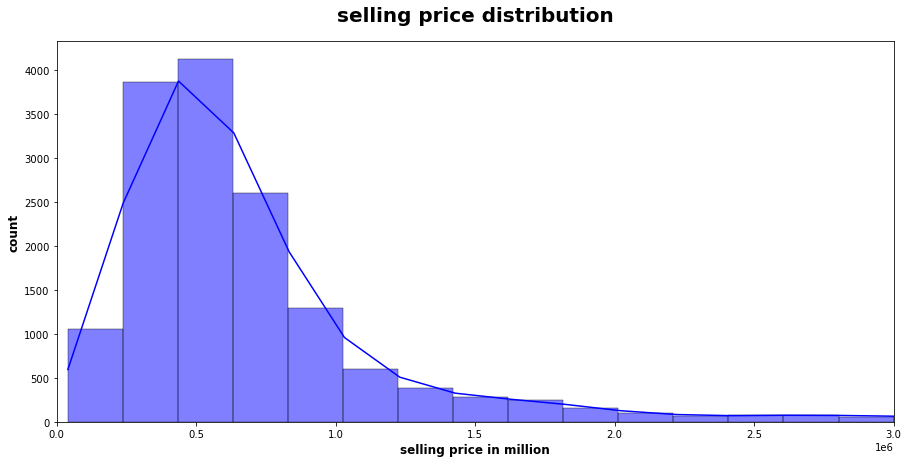

In [56]:
plt.subplots(figsize=(15,7))
sns.histplot(df.selling_price,bins=200,kde=True,color="b")
plt.title("selling price distribution",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("selling price in million",weight="bold",fontsize=12)
plt.xlim(0,3000000)
plt.show()

From the chart it is clear that the Target Variable Skewed

# Most Selling car in Used car website?

In [57]:
df.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

### Most Selling Used Car is Hyundai i20

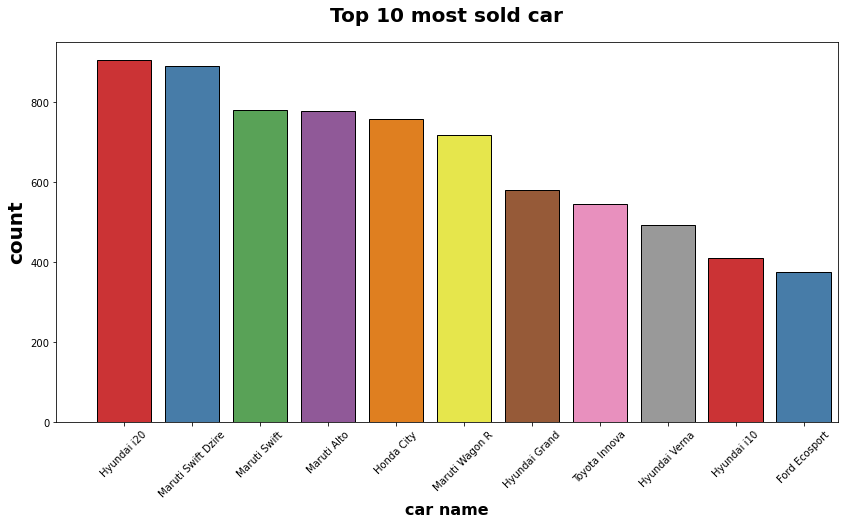

In [63]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name",data=df,ec="black",palette="Set1",order=df['car_name'].value_counts().index)
plt.title("Top 10 most sold car",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=20)
plt.xlabel("car name",weight="bold",fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1,10.5)
plt.show()

### Check mean price of Hyundai i20 which is most sold

In [67]:
i20 = df[df["car_name"]=="Hyundai i20"]["selling_price"].mean()
print(f"The mean price of Hyundai i20 is {i20: .2f} rs")

The mean price of Hyundai i20 is  543603.75 rs


#### Report:

In [68]:
#As per the Chart these are top 10 most selling cars in used car website.
#Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
#Mean Price of Most Sold Car is 5.4 lakhs.
#This Feature has impact on the Target Variable.

### Most selling brand

In [69]:
df.brand.value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

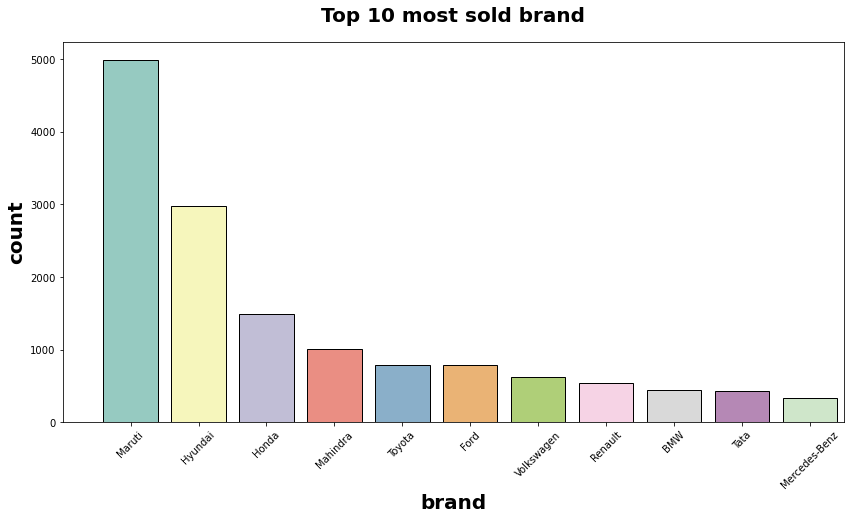

In [76]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand",data=df,ec="black",palette="Set3",order=df['brand'].value_counts().index)
plt.title("Top 10 most sold brand",weight='bold',fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=20)
plt.xlabel("brand",weight="bold",fontsize=20)
plt.xticks(rotation=45)                                                      
plt.xlim(-1,10.5)
plt.show()

## Check the Mean price of Maruti brand which is most sold

In [77]:
maruti = df[df["brand"]=="Maruti"]["selling_price"].mean()
print(f"The mean price of the maruti{maruti: .2f} RS")

The mean price of the maruti 487089.32 RS


### Report:

In [78]:
#As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
#Following Maruti we have Hyundai and Honda.
#Mean Price of Maruti Brand is 4.8 lakhs.

### Costliest Brand and Costliest Car

In [81]:
brand = df.groupby("brand").selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


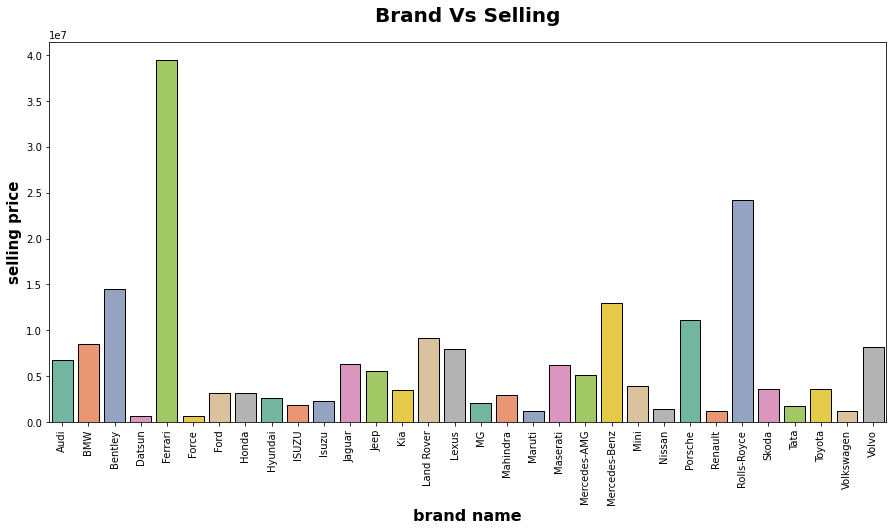

In [85]:
plt.subplots(figsize=(15,7))
sns.barplot(x=brand.index,y=brand.values,ec="black",palette="Set2")
plt.title("Brand Vs Selling",weight="bold",fontsize=20,pad=20)
plt.ylabel("selling price",weight="bold",fontsize=15)
plt.xlabel("brand name",weight = "bold",fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Report:

In [86]:
#Costliest Brand sold is Ferrari at 3.95 Crores.
#Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
#Brand name has very clear impact on selling price.

### Costliest Car

In [87]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


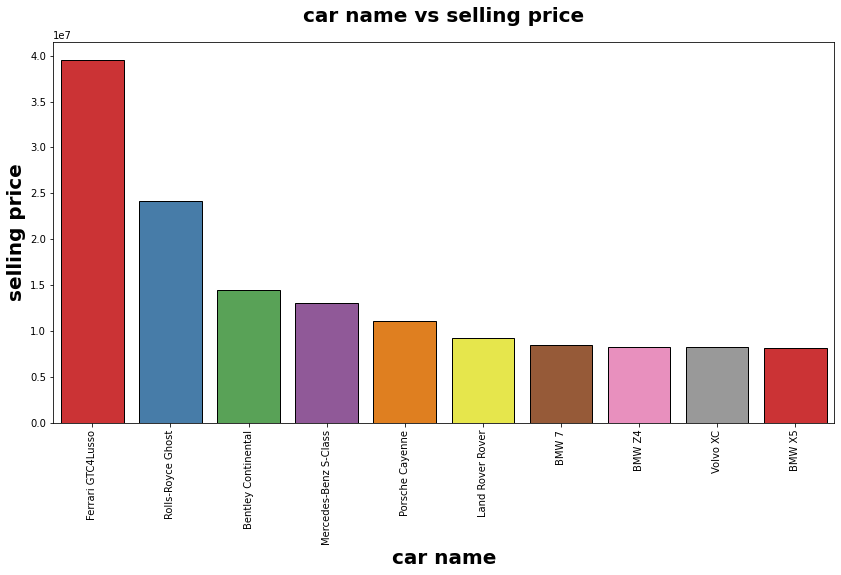

In [88]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index,y=car.selling_price,ec='black',palette='Set1')
plt.title("car name vs selling price",weight='bold',fontsize=20,pad=20)
plt.ylabel("selling price",weight="bold",fontsize=20)
plt.xlabel("car name",weight="bold",fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Report

In [89]:
#Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
#Ferrari selling price is 3.95 Crs.
#Other than Ferrari other car has priced below 1.5cr.

### Most Mileage Brand and Car Name

In [91]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


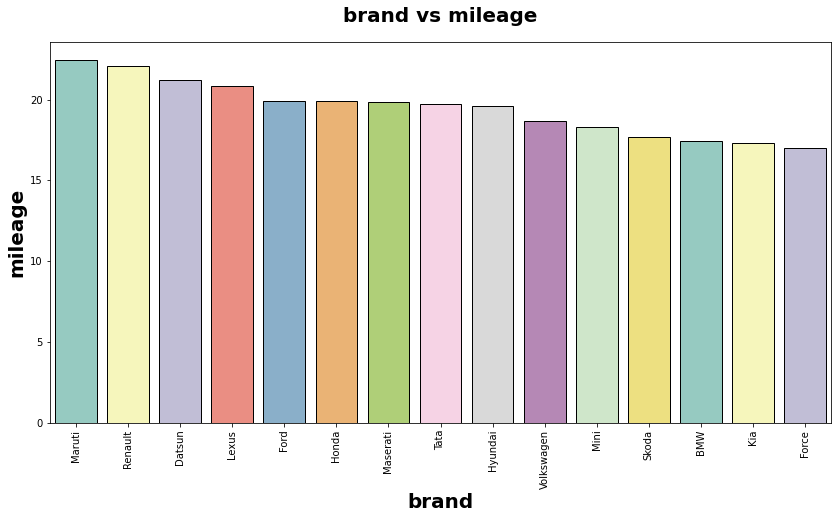

In [93]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index,y=mileage.values,ec='black',palette='Set3')
plt.title("brand vs mileage",weight='bold',fontsize=20,pad=20)
plt.ylabel("mileage",weight="bold",fontsize=20)
plt.xlabel("brand",weight="bold",fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Car with Highest Mileage

In [95]:
mileage_car = df.groupby("car_name")['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


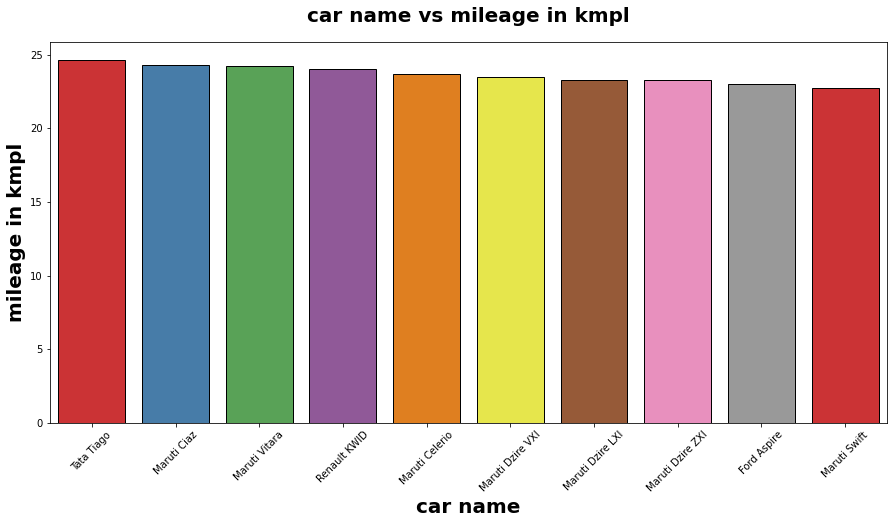

In [102]:
plt.subplots(figsize=(15,7))
sns.barplot(x=mileage_car.index,y=mileage_car.values ,ec = "black",palette="Set1")
plt.title("car name vs mileage in kmpl",weight="bold",fontsize=20,pad=20)
plt.ylabel("mileage in kmpl",weight="bold",fontsize=20)
plt.xlabel("car name",weight="bold",fontsize=20)
plt.xticks(rotation=45)
plt.show()

## Kilometer driven vs Selling Price

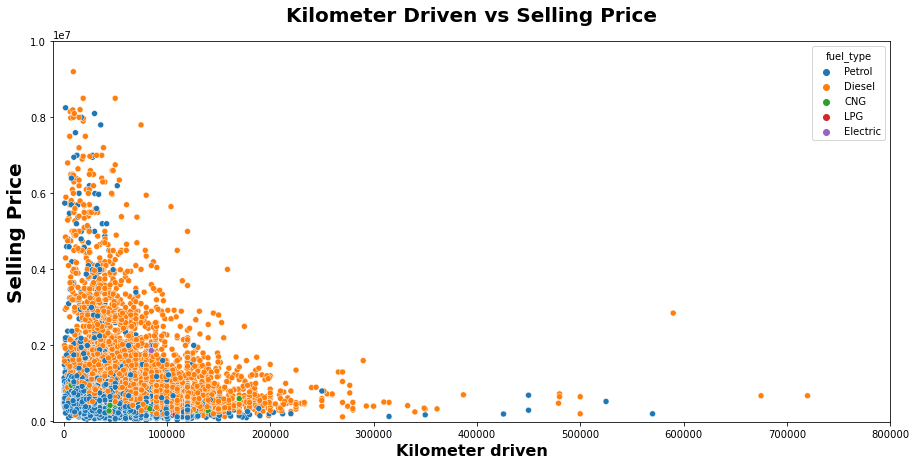

In [108]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="km_driven",y="selling_price",data=df,ec="white",color='b',hue="fuel_type")
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

### Report

In [109]:
#Many Cars were sold with kms between 0 to 20k Kilometers
#Low Kms driven cars had more selling price compared to cars which had more kms driven.

### Fuel Type Selling Price

In [113]:
fuel = df.groupby("fuel_type")["selling_price"].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


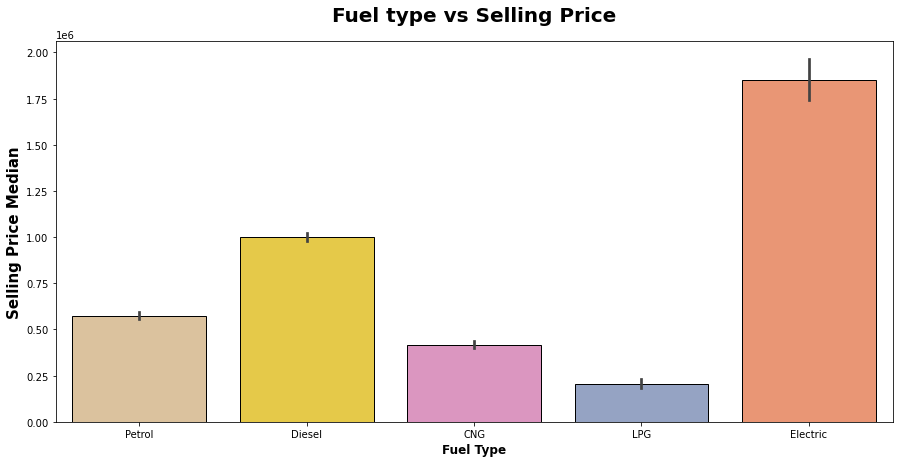

In [115]:
plt.subplots(figsize=(15,7))
sns.barplot(x=df.fuel_type,y=df.selling_price,ec="black",palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Report

In [116]:
#Electric cars have highers selling average price.
#Followed by Diesel and Petrol.
#Fuel Type is also important feature for the Target variable.

### Most sold Fuel type

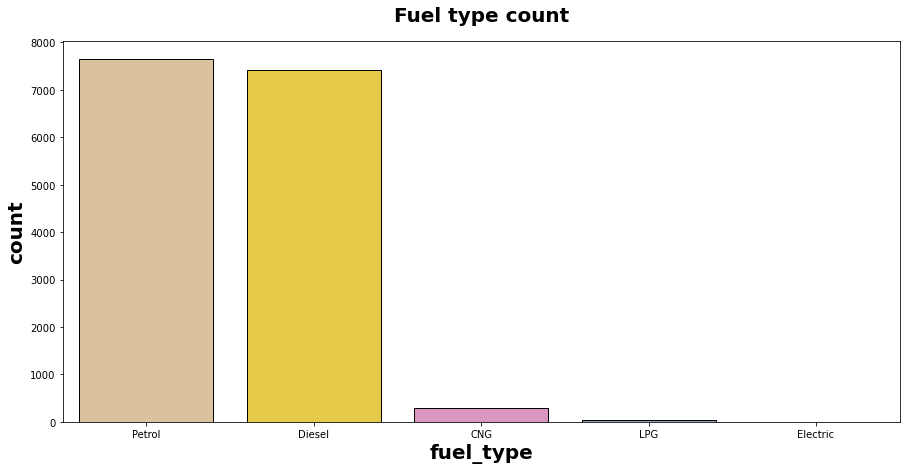

In [118]:
plt.subplots(figsize=(15,7))
sns.countplot(x=df.fuel_type,ec="black",palette="Set2_r")
plt.title("Fuel type count",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",fontsize=20,weight="bold")
plt.xlabel("fuel_type",fontsize=20,weight="bold")
plt.show()

### Report

In [119]:
#Petrol and Diesel dominate the used car market in the website.
#The most sold fuel type Vechicle is Petrol.
#Followed by diesel and CNG and least sold is Electric

### Fuel types available and mileage given

In [122]:
fuel_mileage = df.groupby("fuel_type")['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


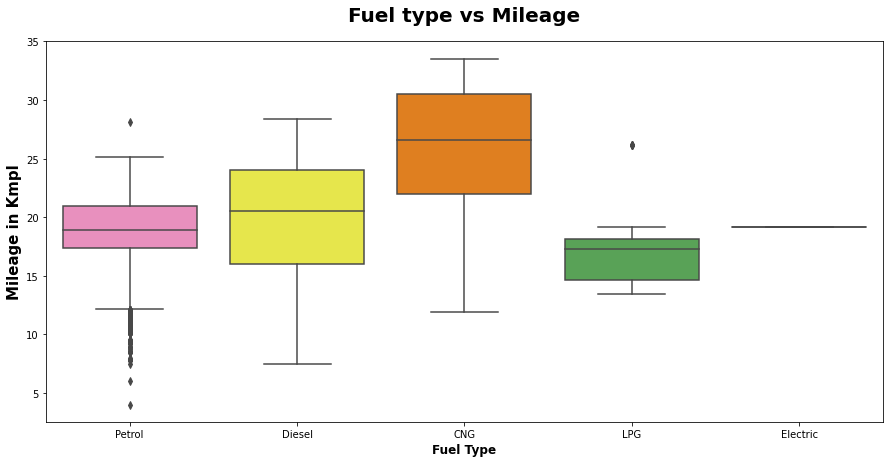

In [123]:
plt.subplots(figsize=(15,7))
sns.boxplot(x="fuel_type",y="mileage",data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

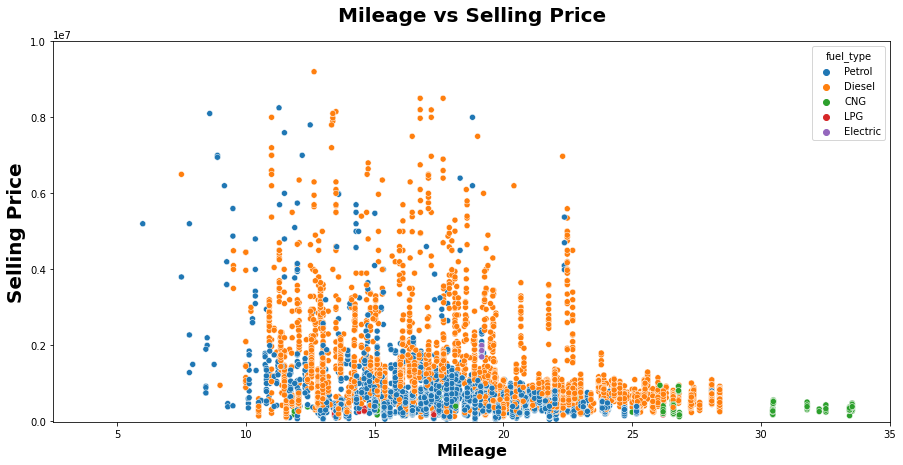

In [124]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="mileage",y="selling_price",data=df,ec="white",color="b",hue="fuel_type")
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

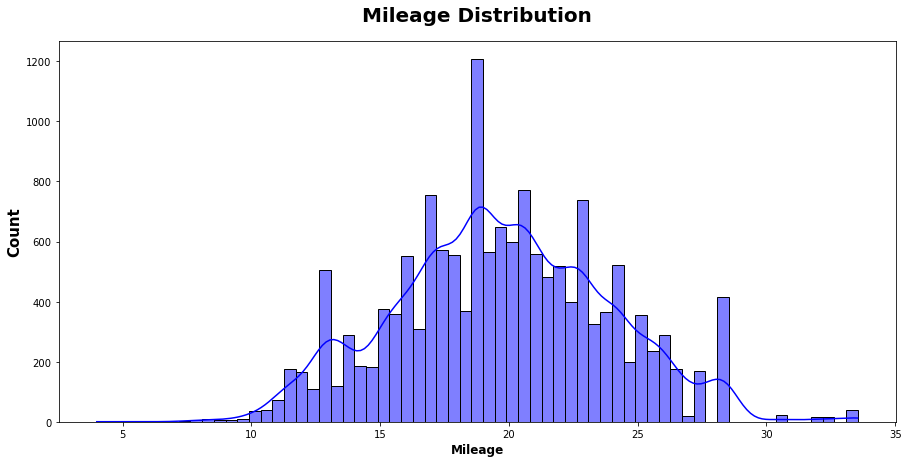

In [128]:
plt.subplots(figsize=(15,7))
sns.histplot(x=df.mileage,ec="black",color="b",kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

### Vehicle age vs Selling Price

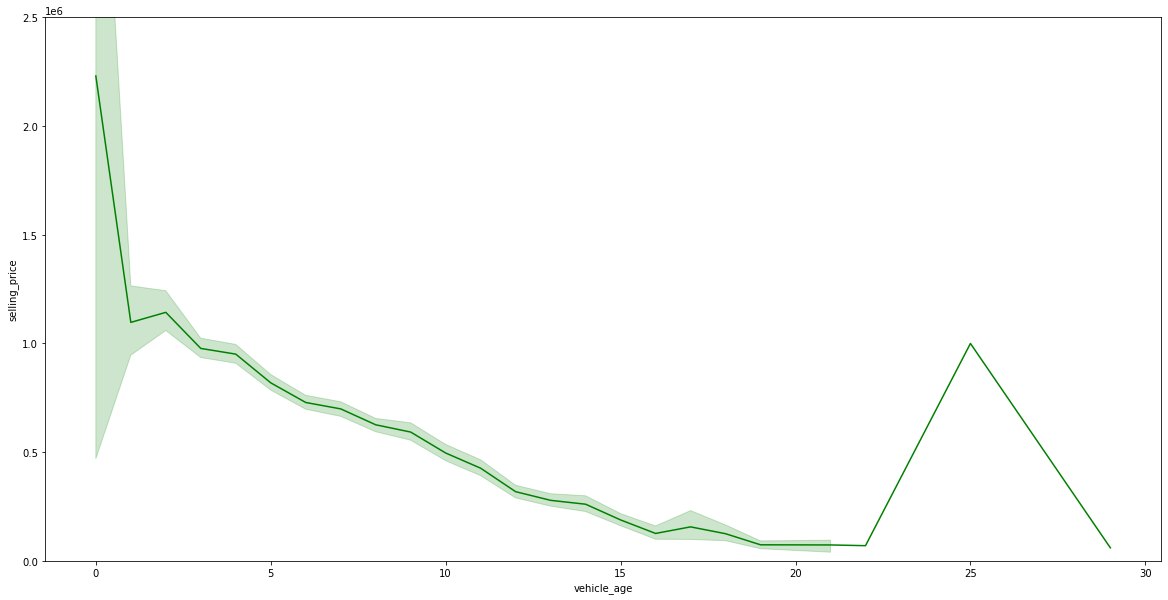

In [129]:
plt.subplots(figsize=(20,10))
sns.lineplot(x="vehicle_age",y="selling_price",data=df,color="g")
plt.ylim(0,2500000)
plt.show()

### Report

In [130]:
#As the Vehicle age increases the price also get reduced.
#Vehicle age has Negative impact on selling price

### Vehicle age vs Mileage

In [132]:
vehical_age = df.groupby("vehicle_age")["mileage"].median().sort_values(ascending=False)
vehical_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


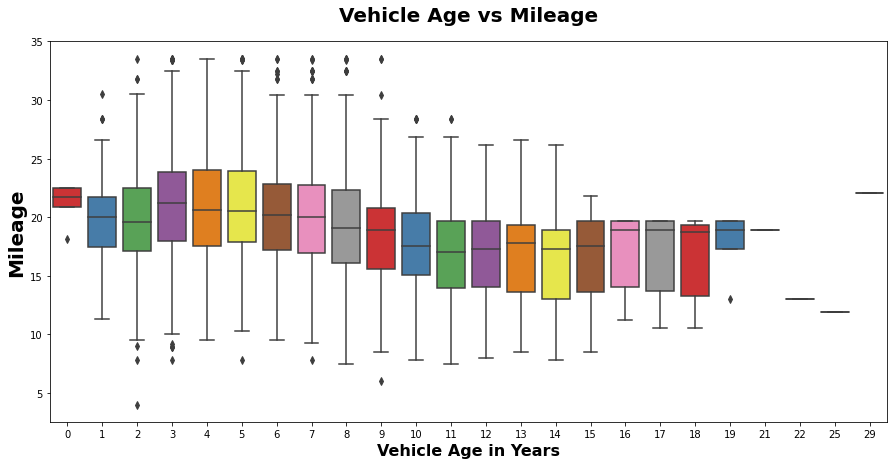

In [133]:
plt.subplots(figsize=(15,7))
sns.boxplot(x=df.vehicle_age,y=df.mileage,palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

### Report

In [134]:
#As the Age of vehicle increases the median of mileage drops.
#Newer Vehicles have more mileage median older vehicle.

In [136]:
oldest = df.groupby("car_name")["vehicle_age"].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


### Report

Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## Transmission Type

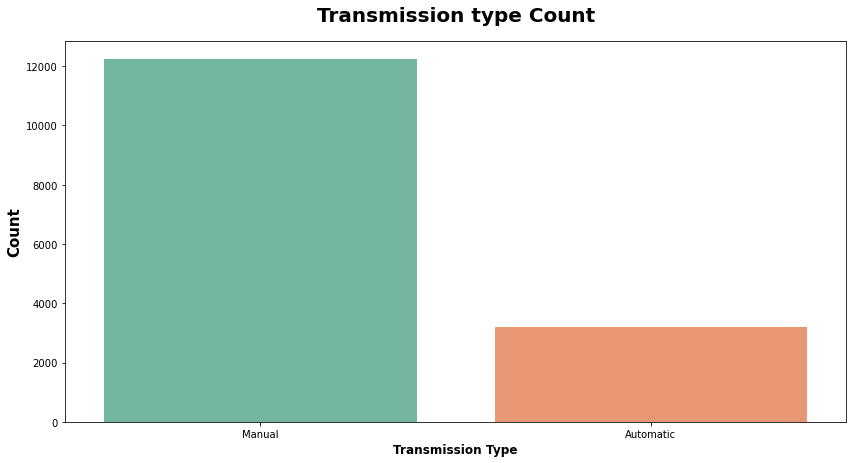

In [137]:
plt.subplots(figsize=(14,7))
sns.countplot(x="transmission_type",data=df,palette="Set2")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

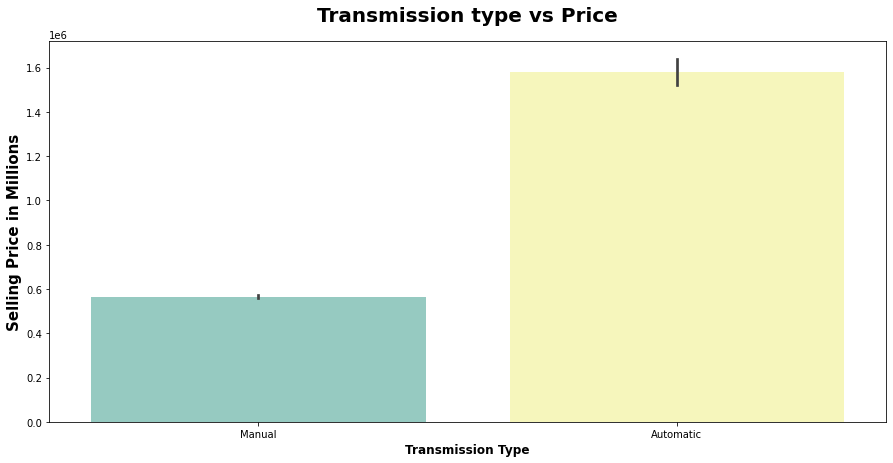

In [139]:
plt.subplots(figsize=(15,7))
sns.barplot(x="transmission_type",y="selling_price",data=df,palette="Set3")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

## Report

In [140]:
#Manual Transmission was found in most of the cars which was sold.
#Automatic cars have more selling price than manual cars.

## Seller Type

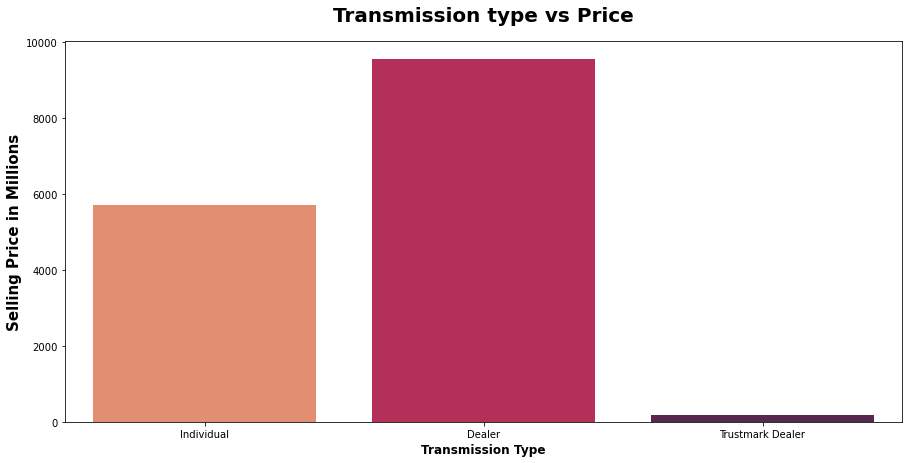

In [142]:
plt.subplots(figsize=(15,7))
sns.countplot(x="seller_type",data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [143]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


### Report

In [144]:
#Dealers have put more ads on used car website.
#Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
#Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
#Dealers have more median selling price than Individual.